## Dogs Vs Cats
Binary Classification Model

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [2]:
import numpy as np
from scipy.misc import imread, imresize 
import matplotlib.pyplot as plt 
%matplotlib inline


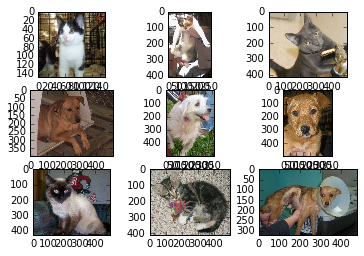

In [3]:
# Show the original images
plt.subplot(331)
plt.imshow(imread('data/train/cats/cat.1000.jpg'))
plt.subplot(332)
plt.imshow(imread('data/train/cats/cat.121.jpg'))
plt.subplot(333)
plt.imshow(imread('data/train/cats/cat.203.jpg'))
plt.subplot(334)
plt.imshow(imread('data/train/dogs/dog.100.jpg'))
plt.subplot(335)
plt.imshow(imread('data/train/dogs/dog.9.jpg'))
plt.subplot(336)
plt.imshow(imread('data/train/dogs/dog.3031.jpg'))
plt.subplot(337)
plt.imshow(imread('data/train/cats/cat.3082.jpg'))
plt.subplot(338)
plt.imshow(imread('data/train/cats/cat.420.jpg'))
plt.subplot(339)
plt.imshow(imread('data/train/dogs/dog.5029.jpg'))

#### Data Preparation

In [4]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [5]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 20
batch_size = 16

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [12]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [14]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#### Exercise: Develop the following model

     Conv2D, 32 filters each (3,3) size
     Activation Relu
     MaxPooling2D (2,2)
     
     Conv2D, 32 filters each (3,3) size
     Activation Relu
     MaxPooling2D (2,2)

     Conv2D, 64 filters each (3,3) size
     Activation Relu
     MaxPooling2D (2,2)

     Flatten()
     
     Dense layer with 64 nodes
     Activation 'relu'
     
     Dropout(.4)
     
     Dense layer with 1 node
     Activation 'sigmoid'    

In [16]:
model = Sequential()
# Add your code here  (update values marked as XXX)
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

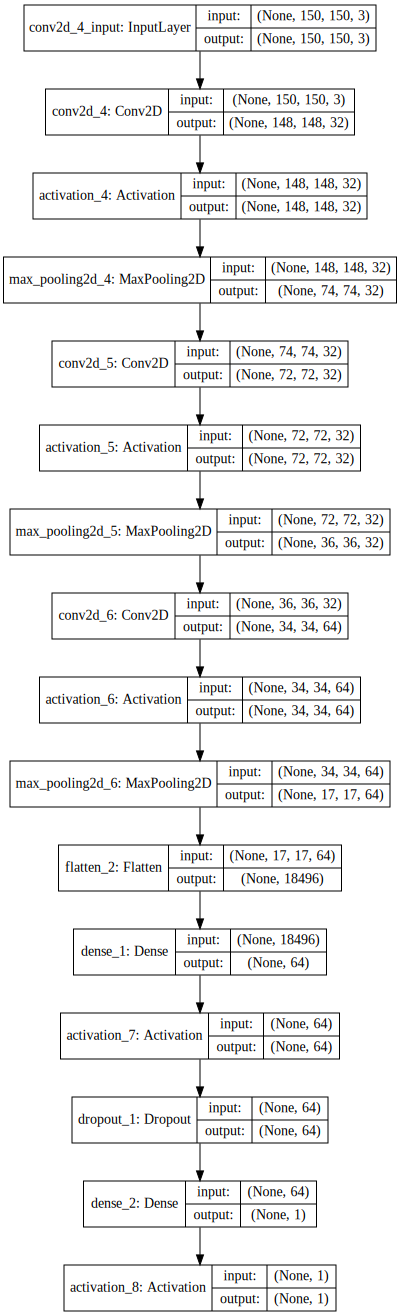

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
125/125 [==============================] - 46s - loss: 0.7123 - acc: 0.5250 - val_loss: 0.6744 - val_acc: 0.5262
Epoch 2/20
125/125 [==============================] - 10s - loss: 0.6743 - acc: 0.5975 - val_loss: 0.6581 - val_acc: 0.6450
Epoch 3/20
125/125 [==============================] - 10s - loss: 0.6612 - acc: 0.6395 - val_loss: 0.6149 - val_acc: 0.6350
Epoch 4/20
125/125 [==============================] - 10s - loss: 0.6341 - acc: 0.6690 - val_loss: 0.5586 - val_acc: 0.7525
Epoch 5/20
125/125 [==============================] - 10s - loss: 0.5993 - acc: 0.6870 - val_loss: 0.5735 - val_acc: 0.7150
Epoch 6/20
125/125 [==============================] - 10s - loss: 0.5951 - acc: 0.6735 - val_loss: 0.5121 - val_acc: 0.7500
Epoch 7/20
125/125 [==============================] - 9s - loss: 0.5795 - acc: 0.7000 - val_loss: 0.5925 - val_acc: 0.6730
Epoch 8/20
125/125 [==============================] - 9s - loss: 0.5759 - acc: 0.7020 - val_loss: 0.5556 - val_acc: 0.7125
Epoch 9/20

In [ ]:
model.save_weights('models/first_try.h5')

In [ ]:
model.load_weights('models/first_try.h5')

In [ ]:
model.evaluate_generator(validation_generator, nb_validation_samples)

### Data augmentation
By applying random transformation to our train set, we artificially enhance our dataset with new unseen images.
This will hopefully reduce overfitting and allows better generalization capability for our network.

In [ ]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

In [ ]:
model.fit_generator(
        train_generator_augmented,
        samples_per_epoch=nb_train_samples,
        nb_epoch=epochs,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

In [ ]:
model.save_weights('models/10000-samples-augmented--1-epochs.h5')

## Evaluating on validation set
Computing loss and accuracy :

In [ ]:
model.evaluate_generator(validation_generator, nb_validation_samples)